In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip -d /content/TESS Toronto emotional speech set data

Archive:  toronto-emotional-speech-set-tess.zip
caution: filename not matched:  Toronto
caution: filename not matched:  emotional
caution: filename not matched:  speech
caution: filename not matched:  set
caution: filename not matched:  data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from  IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths = []
labels = []

for dirname,_,filenames in os.walk('/content/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
  if len(paths)== 2800:
    break
print('dataset is loaded')
len(paths)

dataset is loaded


2800

In [ ]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_hall_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_hole_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_wag_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_ton_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_shawl_disgust.wav']

In [ ]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()
df['label'].value_counts()
df['label_count']= df['label'].value_counts()

In [ ]:
df.drop('label_count', axis=1)

,speech,label
0,/content/TESS Toronto emotional speech set dat...,disgust
1,/content/TESS Toronto emotional speech set dat...,disgust
2,/content/TESS Toronto emotional speech set dat...,disgust
3,/content/TESS Toronto emotional speech set dat...,disgust
4,/content/TESS Toronto emotional speech set dat...,disgust
...,...,...
2795,/content/TESS Toronto emotional speech set dat...,happy
2796,/content/TESS Toronto emotional speech set dat...,happy
2797,/content/TESS Toronto emotional speech set dat...,happy
2798,/content/TESS Toronto emotional speech set dat...,happy


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,disgust
1,/content/TESS Toronto emotional speech set dat...,disgust
2,/content/TESS Toronto emotional speech set dat...,disgust
3,/content/TESS Toronto emotional speech set dat...,disgust
4,/content/TESS Toronto emotional speech set dat...,disgust


In [ ]:
df['label'].value_counts()

,count
label,
disgust,400
angry,400
neutral,400
ps,400
sad,400
fear,400
happy,400


<Axes: xlabel='label', ylabel='count'>

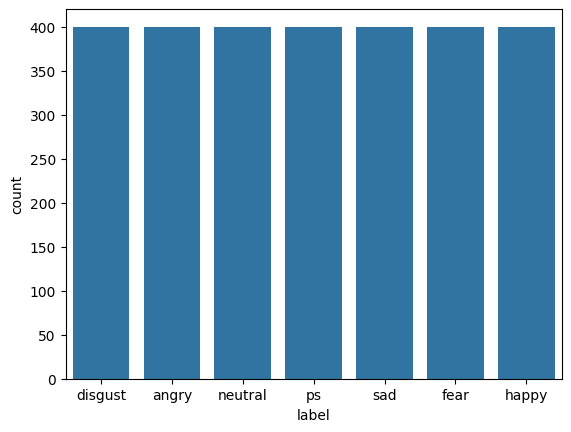

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [ ]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
print(df.head())
print(df['label'].unique())

                                              speech    label
0  /content/TESS Toronto emotional speech set dat...  disgust
1  /content/TESS Toronto emotional speech set dat...  disgust
2  /content/TESS Toronto emotional speech set dat...  disgust
3  /content/TESS Toronto emotional speech set dat...  disgust
4  /content/TESS Toronto emotional speech set dat...  disgust
['disgust' 'angry' 'neutral' 'ps' 'sad' 'fear' 'happy']


In [ ]:
df['speech'].unique()

array(['/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_hall_disgust.wav',
       '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_hole_disgust.wav',
       '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_wag_disgust.wav',
       ...,
       '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_road_happy.wav',
       '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_sub_happy.wav',
       '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_base_happy.wav'],
      dtype=object)

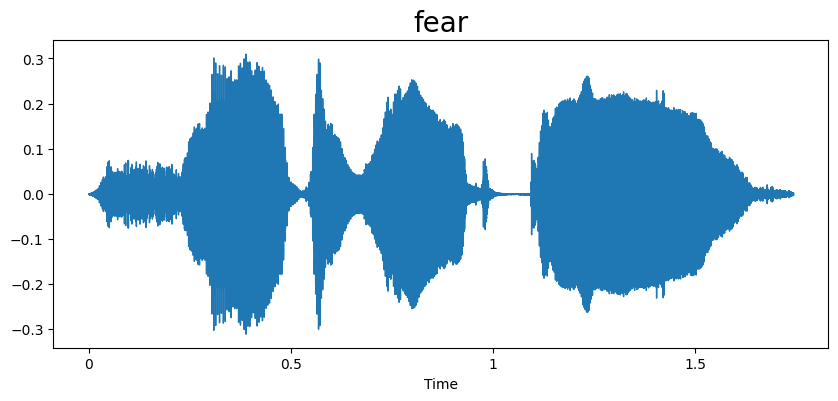

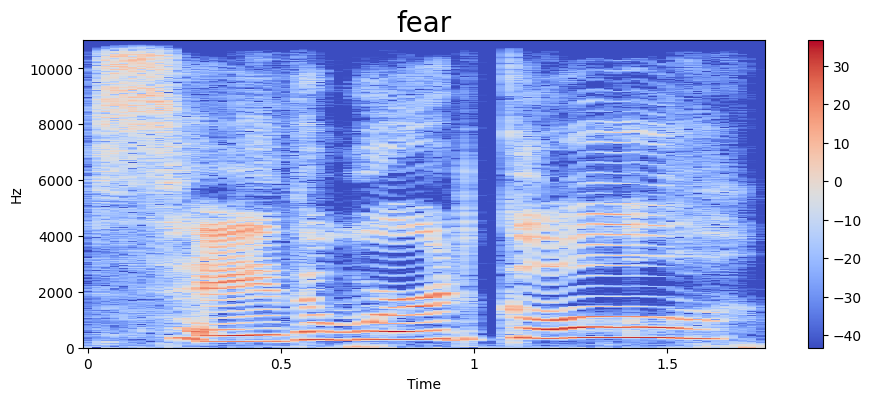

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

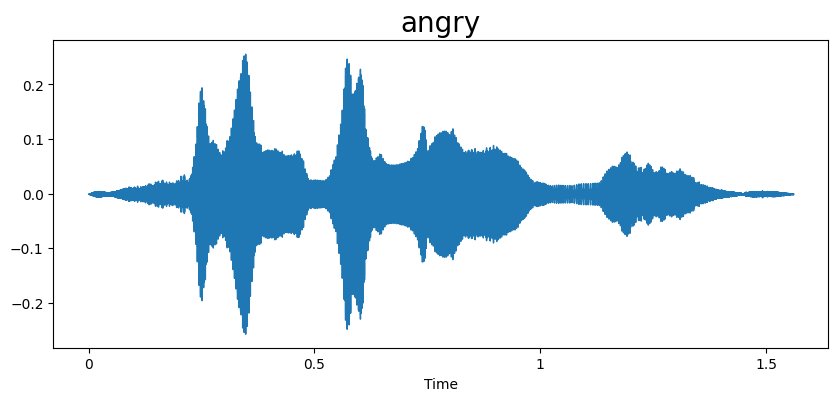

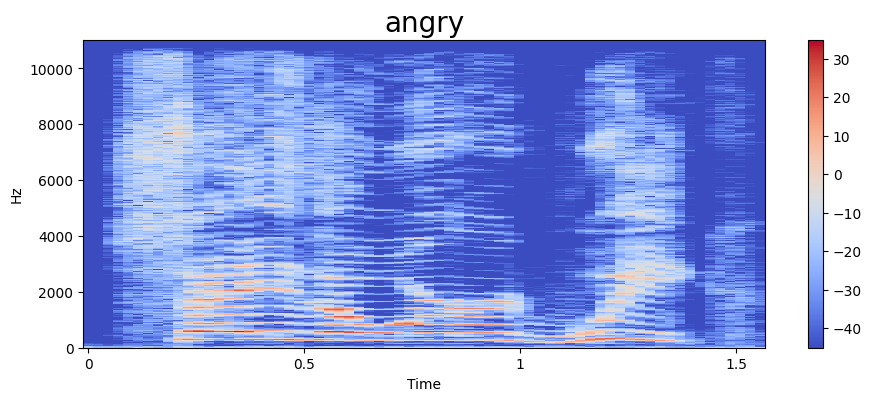

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

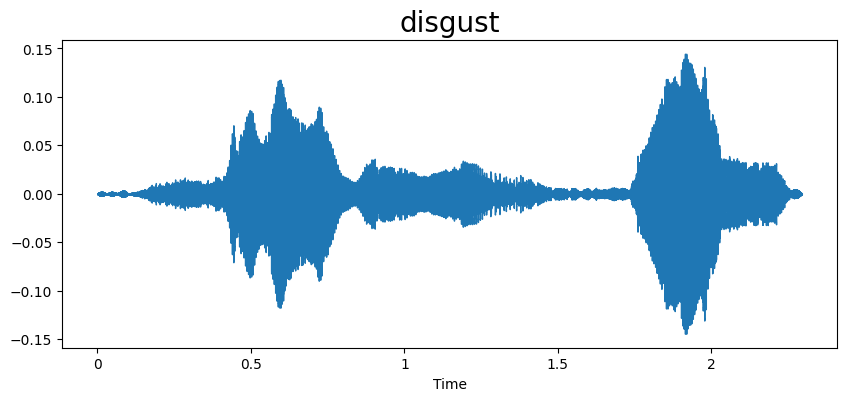

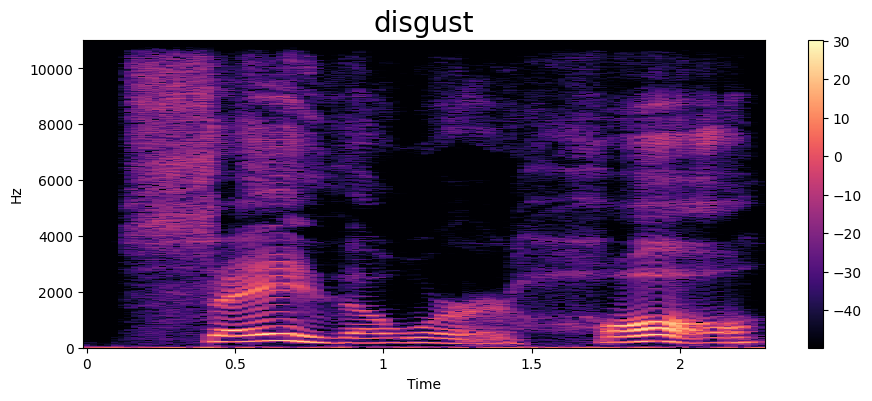

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

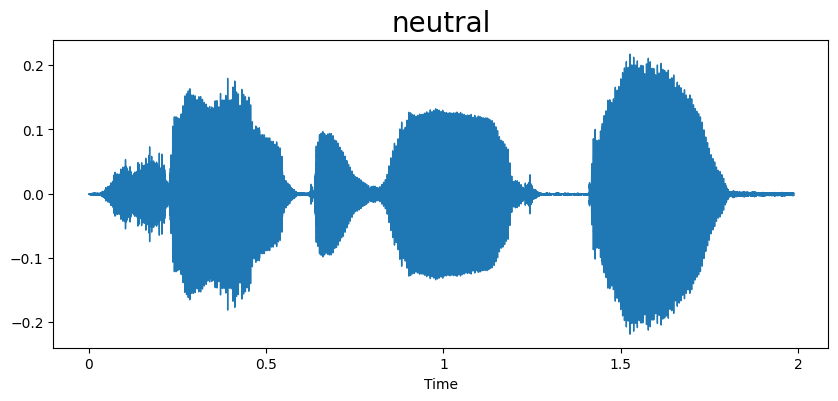

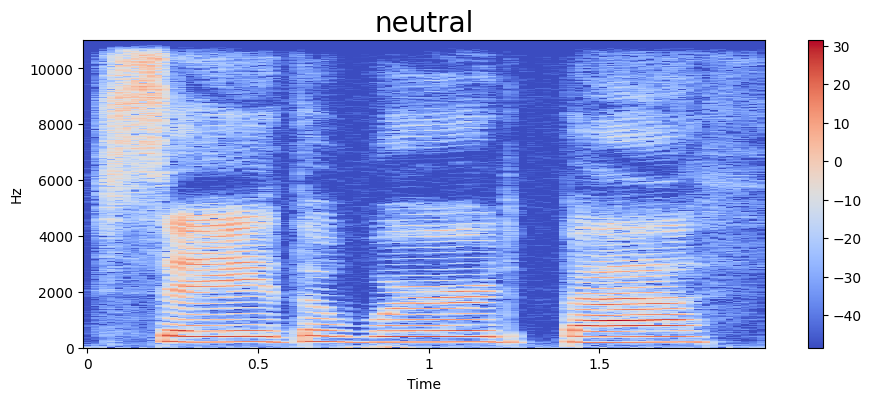

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

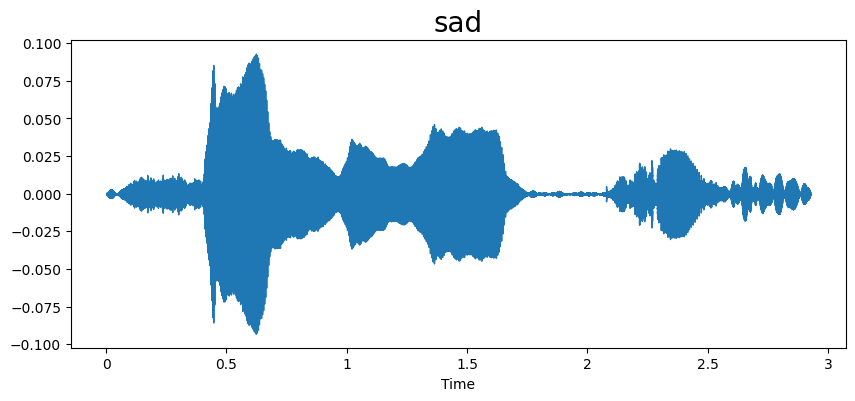

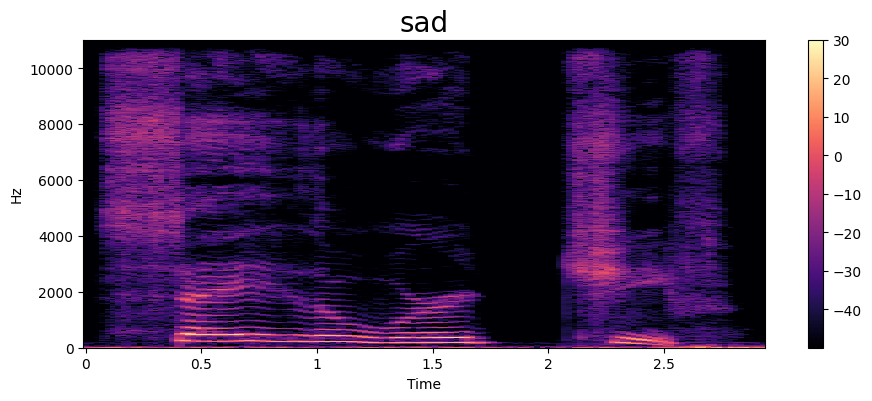

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

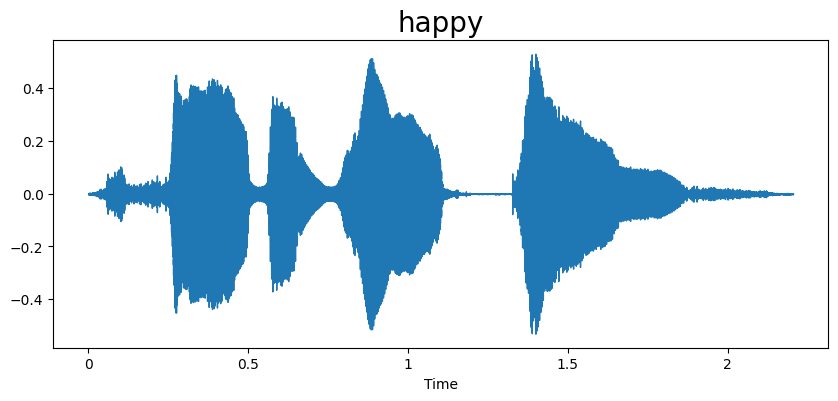

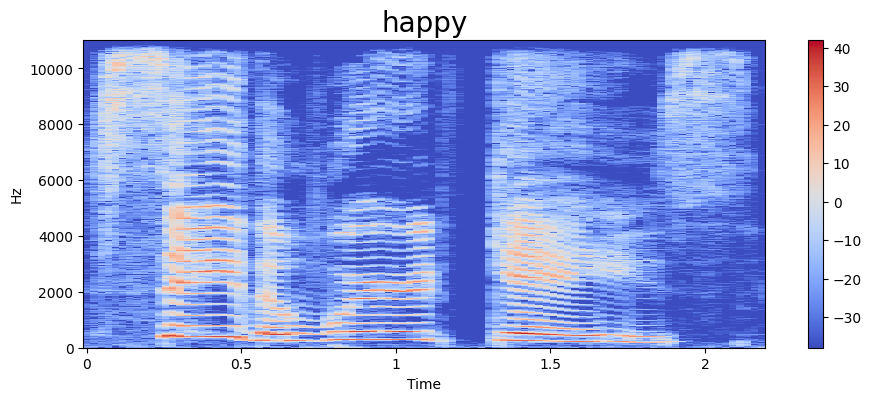

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

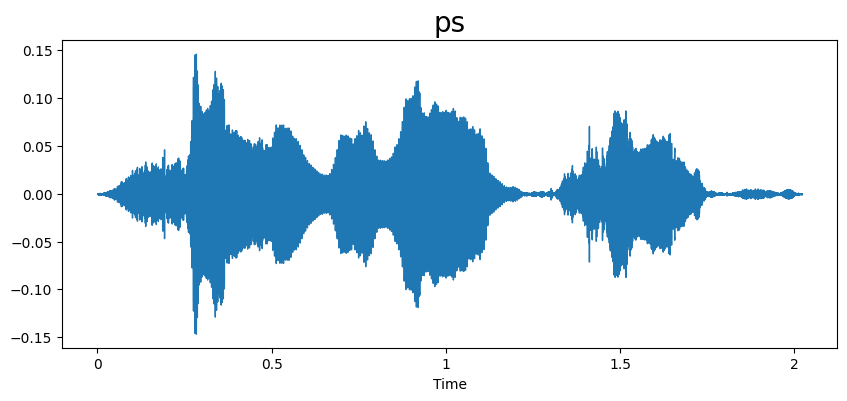

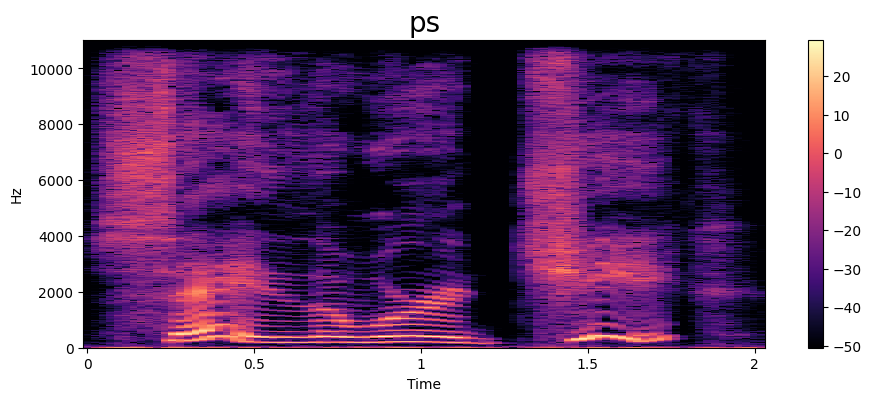

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.35774750e+02,  1.10358902e+02,  2.85997162e+01, -9.89455509e+00,
       -1.55951958e+01, -1.74740906e+01, -1.18276606e+01,  1.01497641e+01,
       -1.99113674e+01,  6.06997156e+00, -5.83294249e+00,  3.36964226e+00,
       -6.07817650e+00,  3.03261113e+00, -5.14129972e+00,  2.84816766e+00,
       -8.61177921e+00,  1.88378707e-01,  2.48182344e+00, -9.02472687e+00,
        7.12318182e-01, -2.73225367e-01, -8.82910919e+00, -1.23965955e+00,
       -2.76369262e+00, -1.10314834e+00,  8.85083601e-02,  4.21247149e+00,
        2.33716464e+00,  6.10298061e+00,  2.01332402e+00,  6.49218512e+00,
        4.06135654e+00,  2.05443597e+00,  6.58613491e+00,  5.07776356e+00,
        8.05554867e+00,  7.54378080e+00,  1.38798389e+01,  1.00621395e+01],
      dtype=float32)

In [ ]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

,speech
0,"[-435.77475, 110.3589, 28.599716, -9.894555, -..."
1,"[-472.7053, 115.509186, 38.54615, 2.443512, -1..."
2,"[-446.2353, 122.961105, 13.020325, -2.429566, ..."
3,"[-441.5598, 104.98848, 6.9742303, -8.661909, 1..."
4,"[-421.38367, 100.34855, 13.05422, -0.32161108,..."
...,...
2795,"[-508.66147, 86.46086, 18.03709, 1.3123938, 12..."
2796,"[-498.72458, 110.73243, 30.936731, -14.99972, ..."
2797,"[-468.59122, 140.66231, 39.48584, -23.188086, ..."
2798,"[-435.76764, 79.770615, 23.92711, -14.983681, ..."


In [ ]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(2800, 40)

In [ ]:
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=64)
history

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.4122 - loss: 1.4411 - val_accuracy: 0.0054 - val_loss: 5.2700
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.8678 - loss: 0.4217 - val_accuracy: 0.0000e+00 - val_loss: 6.6785
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9250 - loss: 0.2535 - val_accuracy: 0.1429 - val_loss: 6.3046
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9495 - loss: 0.1523 - val_accuracy: 0.2768 - val_loss: 5.7072
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9633 - loss: 0.1313 - val_accuracy: 0.2464 - val_loss: 6.4849
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.9696 - loss: 0.0999 - val_accuracy: 0.2661 - val_loss: 6.4732
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.9710 - loss: 0.1091 - val_accuracy: 0.2982 - val_loss: 6.1185
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9744 - loss: 0.0781 - val_accu

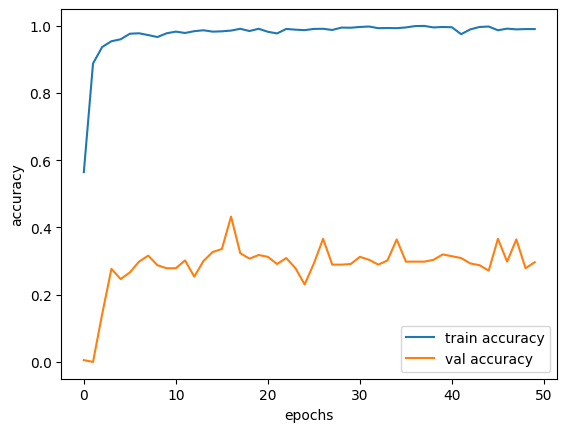

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


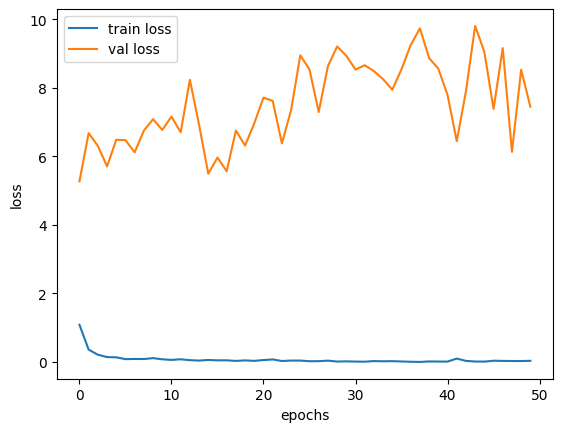

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
emotions= { "01" : "neutral" ,"02" :"angry" ,"03" :"sad" ,"04" :"happy" ,"05" :"ps" ,"06" :"disgust" , "07" :"fear"}
emotions
observed_emotions =[ 'neutral', 'angry','sad','happy','ps','disgust','fear']
observed_emotions

['neutral', 'angry', 'sad', 'happy', 'ps', 'disgust', 'fear']

In [ ]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Confusion Matrix:
[[ 86   0   0   0   0   0   0]
 [  0  67   0   0   0   0   0]
 [ 15   0  42  23   0   0   0]
 [  2  15   0  42   0  14   3]
 [  0   0   0   0 101   0   0]
 [  3   3   0   0   0  68   0]
 [  0   0   0   0   0   0  76]]
Classification Report:
              precision    recall  f1-score   support

       angry       0.81      1.00      0.90        86
     disgust       0.79      1.00      0.88        67
        fear       1.00      0.53      0.69        80
       happy       0.65      0.55      0.60        76
     neutral       1.00      1.00      1.00       101
          ps       0.83      0.92      0.87        74
         sad       0.96      1.00      0.98        76

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.84       560
weighted avg       0.87      0.86      0.85       560



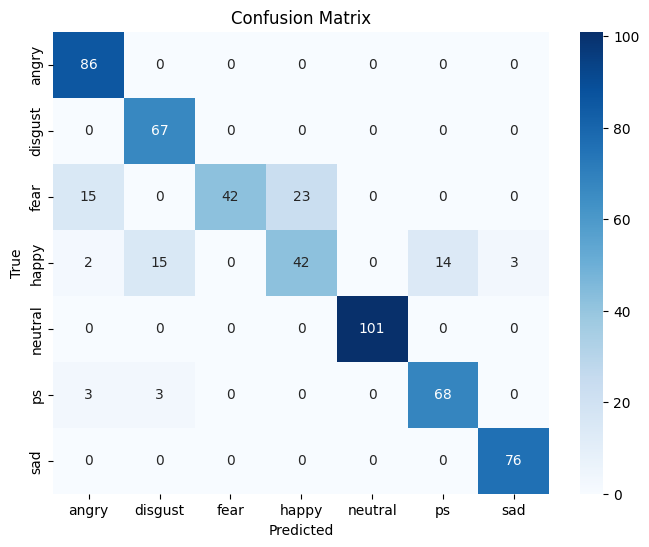

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()